<a href="https://colab.research.google.com/github/Owais-15/Predicting-crop-yield-using-regression-/blob/main/crop_yield(BDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Crop Yield Prediction
# Sayed Mohammad Owais Hussain


The goal of this project is to build and train a model to aid in predicting crop
yield based on a variety of factors, including environmental, soil, and pesticides,
to name a few. The information discovered could help reduce the area needed for
farming, which would help reduce waste and other environmental factors. This
could lead to a more sustainable farming economy

## Step 1: Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import plotly.express as px
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from IPython.display import display
from math import sqrt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.inspection import permutation_importance

In [ ]:
print(os.getcwd())

/content


### Import Datasets

In [ ]:
data_pesticides = pd.read_csv('Data/pesticides.csv')
data_precipitation = pd.read_csv('Data/rainfall.csv')
data_temperature = pd.read_csv('Data/temp.csv')
data_yield = pd.read_csv('Data/yield.csv')


## Step 2: Explore Data

In [ ]:
data_yield.head()

Domain Code Domain  Area Code         Area  Element Code Element  Item Code  \
0          QC  Crops          2  Afghanistan          5419   Yield         56   
1          QC  Crops          2  Afghanistan          5419   Yield         56   
2          QC  Crops          2  Afghanistan          5419   Yield         56   
3          QC  Crops          2  Afghanistan          5419   Yield         56   
4          QC  Crops          2  Afghanistan          5419   Yield         56   

    Item  Year Code  Year   Unit  Value  
0  Maize       1961  1961  hg/ha  14000  
1  Maize       1962  1962  hg/ha  14000  
2  Maize       1963  1963  hg/ha  14260  
3  Maize       1964  1964  hg/ha  14257  
4  Maize       1965  1965  hg/ha  14400

In [ ]:
data_yield.tail()

Domain Code Domain  Area Code      Area  Element Code Element  \
56712          QC  Crops        181  Zimbabwe          5419   Yield   
56713          QC  Crops        181  Zimbabwe          5419   Yield   
56714          QC  Crops        181  Zimbabwe          5419   Yield   
56715          QC  Crops        181  Zimbabwe          5419   Yield   
56716          QC  Crops        181  Zimbabwe          5419   Yield   

       Item Code   Item  Year Code  Year   Unit  Value  
56712         15  Wheat       2012  2012  hg/ha  24420  
56713         15  Wheat       2013  2013  hg/ha  22888  
56714         15  Wheat       2014  2014  hg/ha  21357  
56715         15  Wheat       2015  2015  hg/ha  19826  
56716         15  Wheat       2016  2016  hg/ha  18294

In [ ]:
fields_needed = ['Area', 'Item', 'Year', 'Value']
data_yield = data_yield[fields_needed]

data_yield.head()

Area   Item  Year  Value
0  Afghanistan  Maize  1961  14000
1  Afghanistan  Maize  1962  14000
2  Afghanistan  Maize  1963  14260
3  Afghanistan  Maize  1964  14257
4  Afghanistan  Maize  1965  14400

After creating the fields needed function, that function was
then appended to the data field function to keep the information that we needed.
It was then checked for accuracy using the  ̇head or  ̇tail suffix. For the yield, the
only fields kept were ’Area’, ’Item’, ’Year’, and ’Ve'.ith


In [ ]:
data_temperature.head()

year        country  avg_temp
0  1849  Côte D'Ivoire     25.58
1  1850  Côte D'Ivoire     25.52
2  1851  Côte D'Ivoire     25.67
3  1852  Côte D'Ivoire       NaN
4  1853  Côte D'Ivoire       NaN

In [ ]:
data_temperature.rename(columns = {'year' : 'Year', 'country' : 'Area'}, inplace = True)
data_temperature.head()

Year           Area  avg_temp
0  1849  Côte D'Ivoire     25.58
1  1850  Côte D'Ivoire     25.52
2  1851  Côte D'Ivoire     25.67
3  1852  Côte D'Ivoire       NaN
4  1853  Côte D'Ivoire       NaN

When examining the temperature data, at first the information looked good.
It was decided that all fields were needed however, there was a problem with
Crop Yield and Area Managemency. The original data had ’year’ and ’country’ as labeled columns.
However, ’Year’ and ’Area’ are used in the yield data. In order to join the data,
it was needed to use the  ̇rename function to ensure that the column headers
were consistent. As seen below, the columns were renamed to align with the
yield data.

In [ ]:
data_precipitation.head()

Area  Year average_rain_fall_mm_per_year
0  Afghanistan  1985                           327
1  Afghanistan  1986                           327
2  Afghanistan  1987                           327
3  Afghanistan  1989                           327
4  Afghanistan  1990                           327

The precipitation file contained only the columns that we needed. We were
provided with the ’Area’, ’Year’, and ’average rain fall mm per year’. While the
last column header is not exactly how it wanted, it was decided to adjust the
column header during the merge sequence of the project.


In [ ]:

data_pesticides.head()

Domain     Area Element                Item  Year  \
0  Pesticides Use  Albania     Use  Pesticides (total)  1990   
1  Pesticides Use  Albania     Use  Pesticides (total)  1991   
2  Pesticides Use  Albania     Use  Pesticides (total)  1992   
3  Pesticides Use  Albania     Use  Pesticides (total)  1993   
4  Pesticides Use  Albania     Use  Pesticides (total)  1994   

                           Unit  Value  
0  tonnes of active ingredients  121.0  
1  tonnes of active ingredients  121.0  
2  tonnes of active ingredients  121.0  
3  tonnes of active ingredients  121.0  
4  tonnes of active ingredients  201.0

In [ ]:
fields_needed = ['Area', 'Year', 'Value']
data_pesticides = data_pesticides[fields_needed]

data_pesticides.head()

Area  Year  Value
0  Albania  1990  121.0
1  Albania  1991  121.0
2  Albania  1992  121.0
3  Albania  1993  121.0
4  Albania  1994  201.0

The last field to check was the pesticide information. Pesticides are notorious
for helping protect crops against invasive species which leads to a higher yield.
When pulling the pesticide information, the following information was available,
’Domain’, ’Area’, ’Element’, ’Item’, ’Year’, ’Unit’, and ’Value’. Again, the only
information needed was ’Area’, ’Year’, and ’Value’. The domain was all the same,
the element column was only about its use, the item was known to be a pesticide
and the unit was the same for all. Due to these occurrences, the columns were
eliminated.

### Examine The Cleaned Data

In [ ]:
print('Pesticides :', data_pesticides.shape)
print('Precipitation :', data_precipitation.shape)
print('Temperature :', data_temperature.shape)
print('Yield :', data_yield.shape)

Pesticides : (4349, 3)
Precipitation : (6727, 3)
Temperature : (71311, 3)
Yield : (56717, 4)


In [ ]:
data_temperature = data_temperature[data_temperature.Year >= 1961]
yield_merge = pd.merge(data_yield, data_temperature, on =['Year', 'Area'])
yield_merge = pd.merge(yield_merge, data_pesticides, on = ['Year', 'Area'])
yield_merge.rename(columns = {'Value_x': 'Yield', 'Value_y': 'Pesticides'}, inplace = True)
data_precipitation.rename(columns = {' Area': 'Area',}, inplace = True)
yield_merge = pd.merge(yield_merge, data_precipitation, on = ['Year', 'Area'])
yield_merge.rename(columns = {'average_rain_fall_mm_per_year':'avg_precipitation'}, inplace = True)
yield_merge.head()
df_yield = yield_merge

df_yield.head()

Area   Item  Year  Yield  avg_temp  Pesticides avg_precipitation
0  Albania  Maize  1990  36613     16.37       121.0              1485
1  Albania  Maize  1991  29068     15.36       121.0              1485
2  Albania  Maize  1992  24876     16.06       121.0              1485
3  Albania  Maize  1993  24185     16.05       121.0              1485
4  Albania  Maize  1994  25848     16.96       201.0              1485

In [ ]:
# Specify the folder path
folder_path = 'Data'

# Ensure the "Data" folder exists; create it if it doesn't
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# Create the full file path
file_name = 'df_yield.csv'
full_file_path = os.path.join(folder_path, file_name)

# Save the DataFrame to the specified file
df_yield.to_csv(full_file_path, index=False)

print(f"DataFrame 'df_yield' saved to '{full_file_path}'")

DataFrame 'df_yield' saved to 'Data/df_yield.csv'


In [ ]:
df_yield.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28248 entries, 0 to 28247
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               28248 non-null  object 
 1   Item               28248 non-null  object 
 2   Year               28248 non-null  int64  
 3   Yield              28248 non-null  int64  
 4   avg_temp           28248 non-null  float64
 5   Pesticides         28248 non-null  float64
 6   avg_precipitation  28248 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 1.5+ MB


In [ ]:
df_yield.shape

(28248, 7)

## Exploratory Data Analysis

In [ ]:
# Examine Numerical Statistics

df_yield.describe().T

count          mean           std      min       25%       50%  \
Year        28248.0   2001.541950      7.052997  1990.00   1995.00   2001.00   
Yield       28248.0  77047.863282  84950.194454    50.00  19918.75  38295.00   
avg_temp    28248.0     20.543722      6.311828     1.30     16.71     21.51   
Pesticides  28248.0  37069.136973  59954.787836     0.04   1695.71  17517.76   

                  75%        max  
Year          2008.00    2013.00  
Yield       104598.25  501412.00  
avg_temp        26.00      30.65  
Pesticides   48687.88  367778.00

From the table we see that the average yield is 77047, average temperature was 20.5, and average pesticide use was 37069.

In [ ]:
# Examine Categorical Data

df_yield.describe(include = 'object')

Area      Item avg_precipitation
count   28248     28248             28248
unique    101        10               101
top     India  Potatoes              1083
freq     4048      4276              4048

Here we can see that we have the same amount of records as our numerical data. India was the top country in Area, whereas potatoes are the top crop

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Yield'}>],
       [<Axes: title={'center': 'avg_temp'}>,
        <Axes: title={'center': 'Pesticides'}>]], dtype=object)

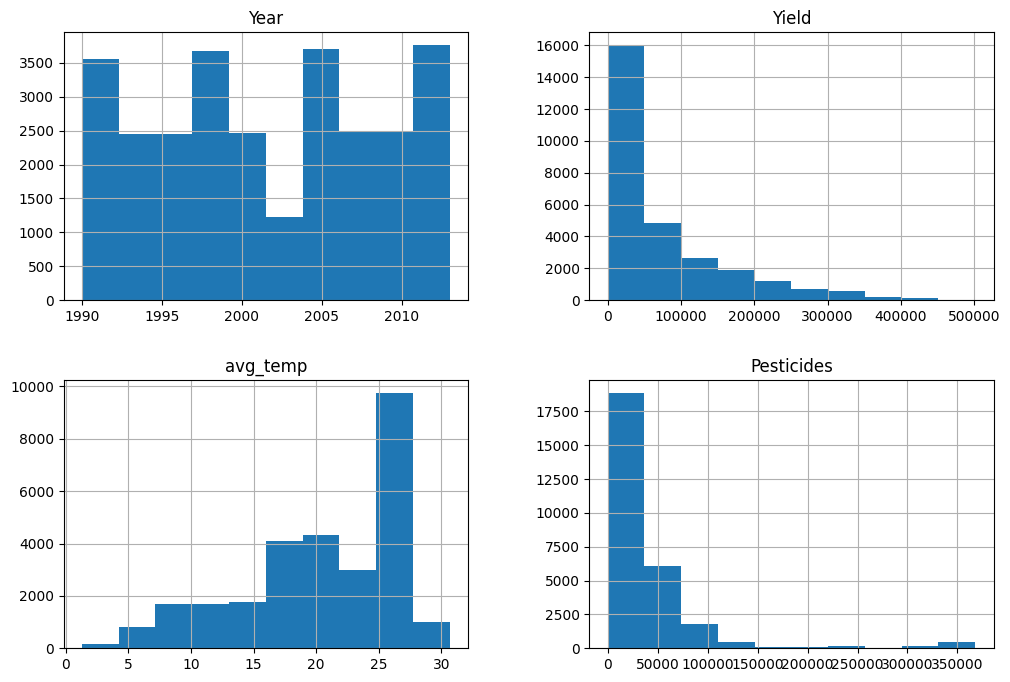

In [ ]:
df_yield.hist(figsize=(12,8))

For our data to be presented more accurately, any country that does not produce at least 100 records is going to be dropped. This will help eliminate some outlier information and prevent skewed data.

In [ ]:
# Remove Countries

country_records =df_yield['Area'].value_counts()
drop_countries = country_records[country_records < 100].index.tolist()
df_filtered = df_yield[~df_yield['Area'].isin(drop_countries)]
df_yield = df_filtered.reset_index(drop=True)

In [ ]:
df_yield.shape

(26297, 7)

<Axes: >

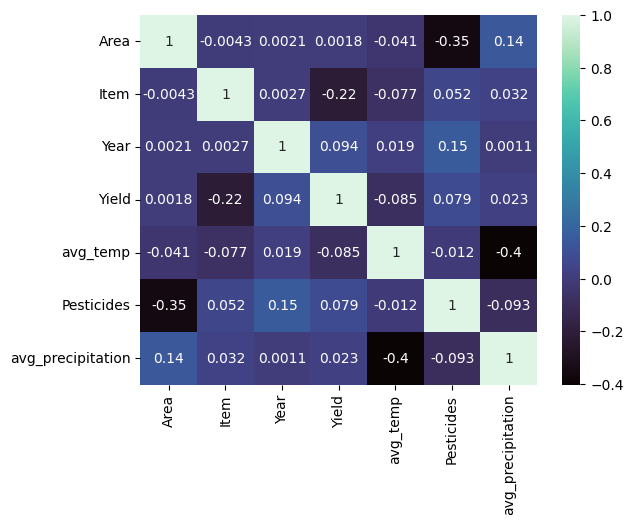

In [ ]:
# Create a copy of our data for visualizations

df_yield_copy = df_yield.copy()

# Data Cleaning

category_fields = df_yield_copy.select_dtypes(include=['object']).columns.tolist()
label_encoder = LabelEncoder()
for column in category_fields:
    df_yield_copy[column] = label_encoder.fit_transform(df_yield_copy[column])


# View Correlation Matrix

sns.heatmap(df_yield_copy.corr() , annot= True , cmap='mako')

The data obtained from this visual showed a few weak correlations. When looking at area, we can see that there is a weak negative correlation between Pesticides used and Average Precipitation. We also see a weak negative correlation between Item and Yield. We have a weak positive correlation between Average Temperature and Average Precipitation.

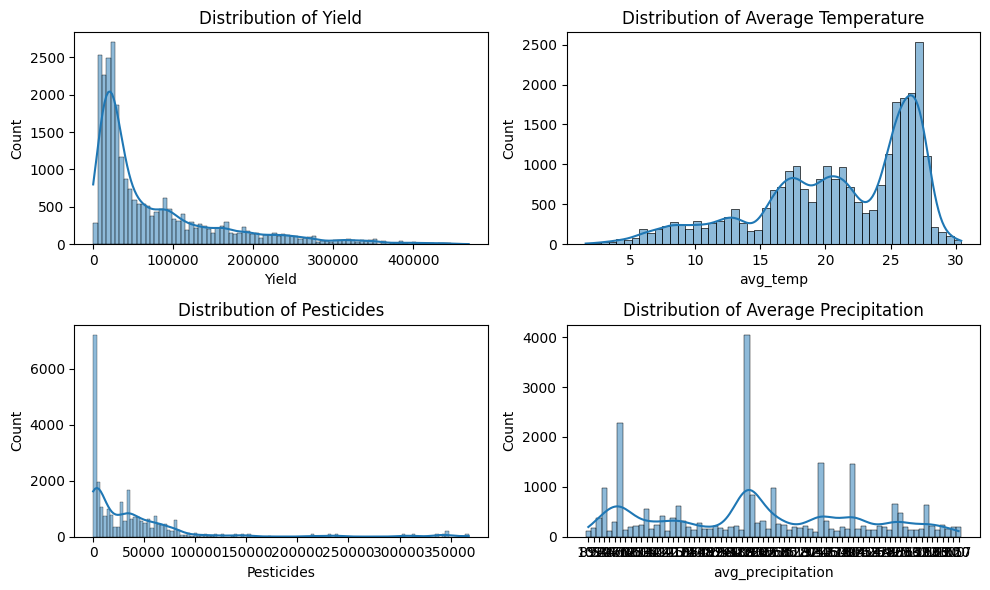

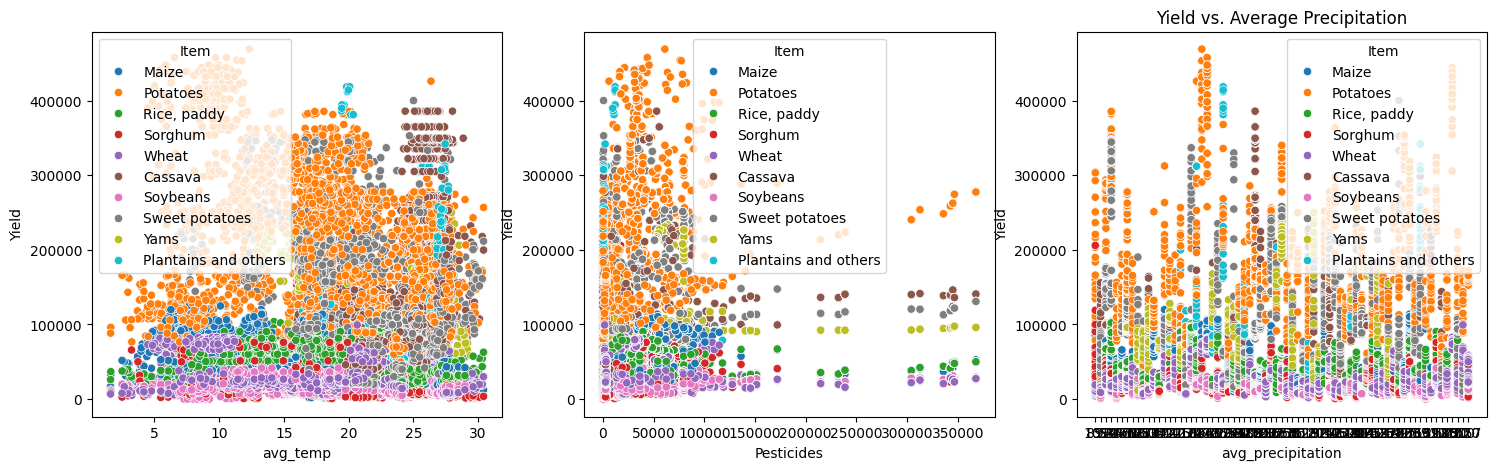

In [ ]:
# Set Color Palette
sns.color_palette("rocket")

# Distribution plots
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
sns.histplot(df_yield['Yield'], ax=axes[0, 0], kde=True).set_title('Distribution of Yield')
sns.histplot(df_yield['avg_temp'], ax=axes[0, 1], kde=True).set_title('Distribution of Average Temperature')
sns.histplot(df_yield['Pesticides'], ax=axes[1, 0], kde=True).set_title('Distribution of Pesticides')
sns.histplot(df_yield['avg_precipitation'], ax=axes[1, 1], kde=True).set_title('Distribution of Average Precipitation')
plt.tight_layout()
plt.show()

# Scatter plot of 'Yield' vs. 'avg_temp', 'Pesticides', 'avg_precipitation'
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.scatterplot(x='avg_temp', y='Yield', data=df_yield, hue='Item', ax=axes[0])
plt.title('Yield vs. Average Temperature')
sns.scatterplot(x='Pesticides', y='Yield', data=df_yield, hue='Item', ax=axes[1])
plt.title('Yield vs. Average Pesticides')
sns.scatterplot(x='avg_precipitation', y='Yield', data=df_yield, hue='Item', ax=axes[2])
plt.title('Yield vs. Average Precipitation')
plt.show()

From the images we have obtained, we can see that for our average yield, we have a right tail indicating that high yields are less common than average yields. The average precipitation seems to have a fairly normal skew while pesticides values tend to be on the lower end.

Looking at the scatter plots, we see variability between all of our crops and yields. Average temperature shows that some crops have a wider variability such as wheat and rice whereas cassava and sweet potatoes are more clustered. This indicates that temperature ranges are variable depending on the crop but no significant linear relationship exists. Pesticide usuage shows that most of our yield comes from lower pesticide usage. Finally, with precipitation we still do not have a distinct linear relationship. It is noted that on precipitation, we have a larger cluster towarsd the bottom. This can indicate that crops have a threshold of precipitation when it comes to determining the yield.

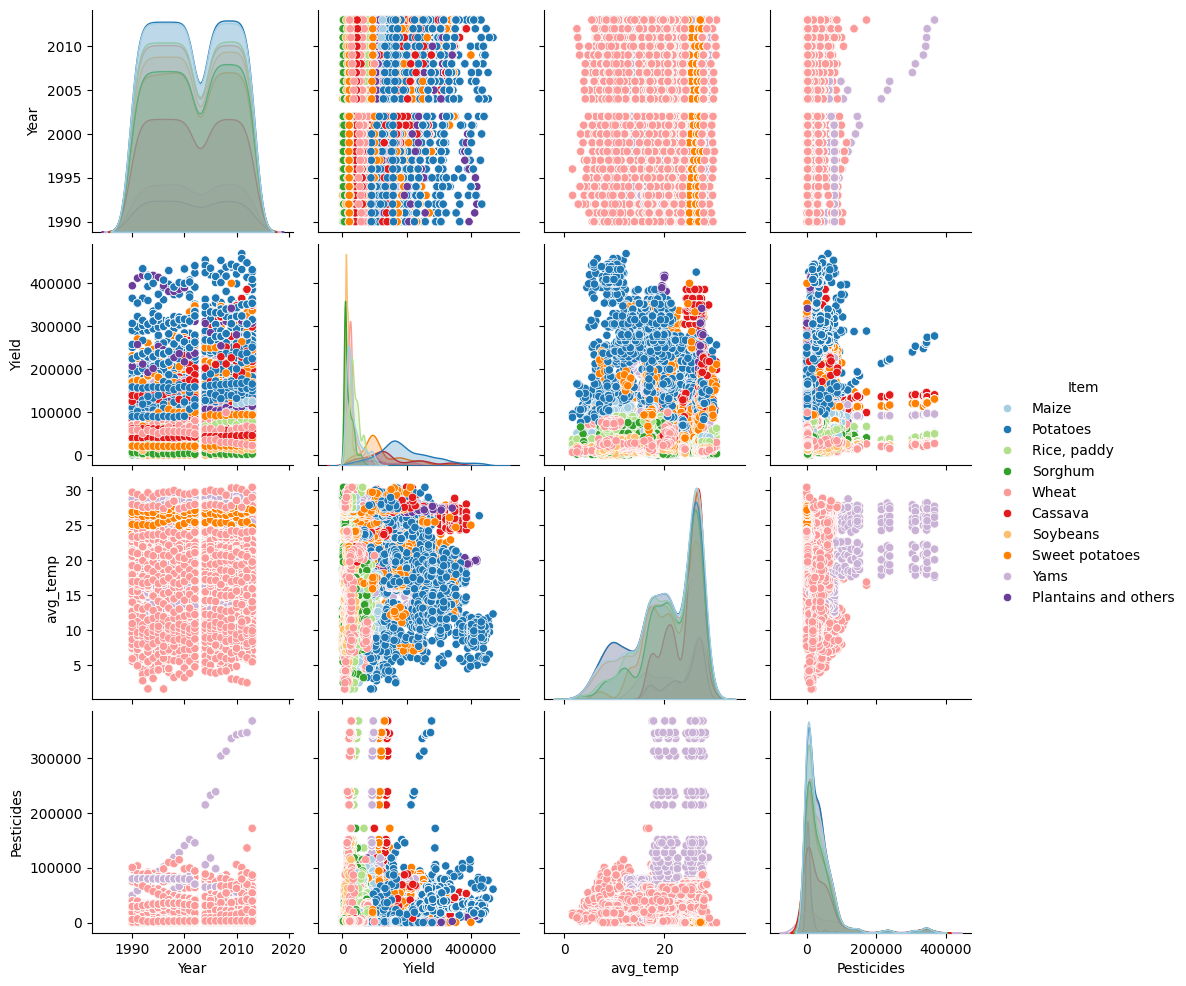

In [ ]:
sns.pairplot(data=df_yield,hue='Item',kind='scatter',palette='Paired')

The first group of charts shows the year, yield, and average temperature with crop distribution overlaid. We can see that the values are bimodal indicating different peaks in the various crops. When observing, Year vs Yield, we can see a more concentrated level of data in the late 2000's meaning that we crop yields are either getting better or we have more data. Due to there being a non discernible upward or downward trend, the inference is that we have more data. Average temperature seems to be remaining near the same across the years whereas pesticide usage has increased.
When comparing yield to environmental factors, we again do not see a strong correlation between temperatures and crop yield. As shown in the correlation matrix, high pesticide usage does not show a clear indication of higher yield. One interesting point is when looking at the variance in soybeans and sweet potatoes suggesting they are more susceptible to environmental factors

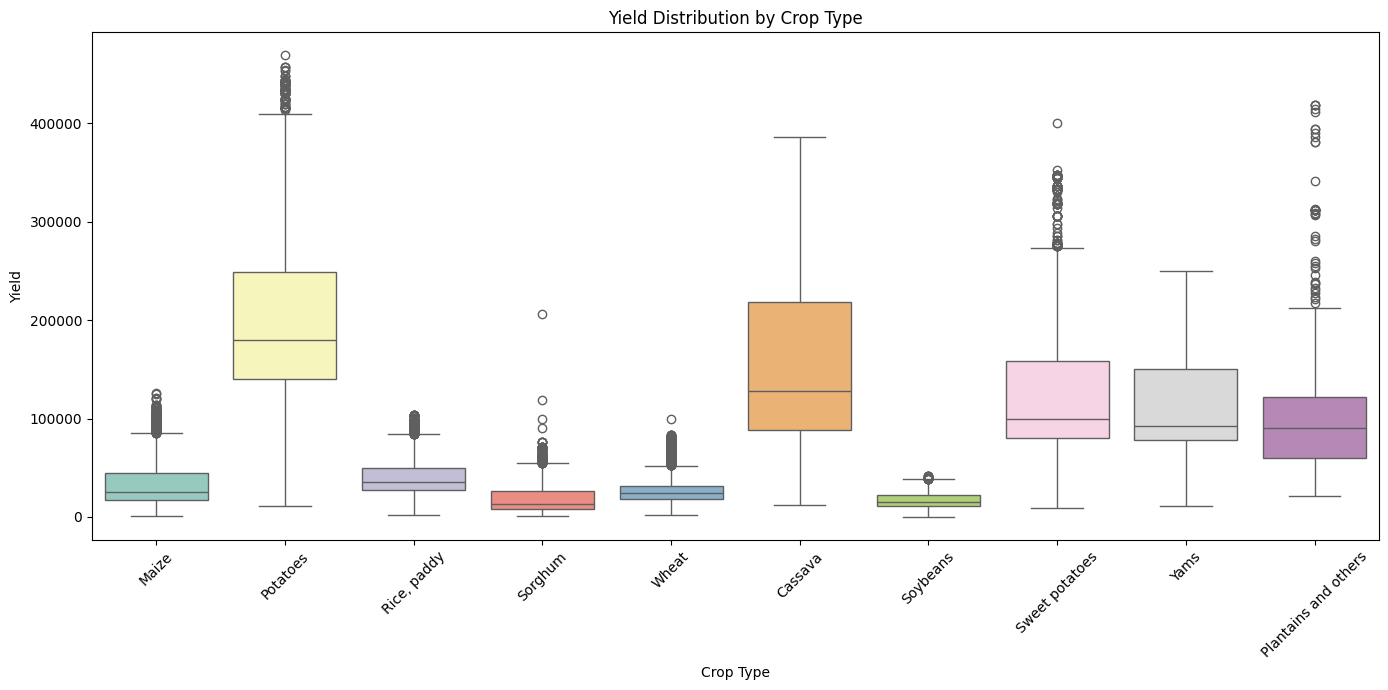

In [ ]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='Item', y='Yield', data=df_yield, hue='Item', dodge=False, palette="Set3", legend=False)

# Improve the aesthetics
plt.xticks(rotation=45)  # Rotate the x labels for better readability
plt.title('Yield Distribution by Crop Type')
plt.xlabel('Crop Type')
plt.ylabel('Yield')

# Show the plot
plt.tight_layout()
plt.show()

### Yield By Countries

In [ ]:
# Ensure 'Yield' is a numerical data type
df_yield['Yield'] = pd.to_numeric(df_yield['Yield'], errors='coerce')

# Drop NaN values that may have resulted from conversion
df_yield.dropna(subset=['Yield'], inplace=True)

# Use qcut to split 'Area' into 6 quantiles
df_yield['group'] = pd.cut(df_yield['Area'].astype('category').cat.codes, bins=6, labels=False)

# Group by the new 'group' column and 'Area', then sum 'Yield'
grouped_yield = df_yield.groupby(['group', 'Area'])['Yield'].sum().reset_index()

# Sort the results by 'group' and 'Yield' to compare total yields
sorted_grouped_yield = grouped_yield.sort_values(by=['group', 'Yield'], ascending=[True, False])

# Print the sorted grouped yield
print(sorted_grouped_yield)

    group        Area      Yield
6       0      Brazil  167550306
3       0   Australia  109111062
11      0      Canada   34706922
2       0   Argentina   32864032
5       0  Bangladesh   15440318
..    ...         ...        ...
65      5      Uganda    7494314
70      5    Zimbabwe    7408629
69      5      Zambia    7254311
62      5  Tajikistan    6295210
66      5     Ukraine    5496901

[71 rows x 3 columns]


After splitting into groups, we can visualize the yield and precipitation for the Area's for each group.

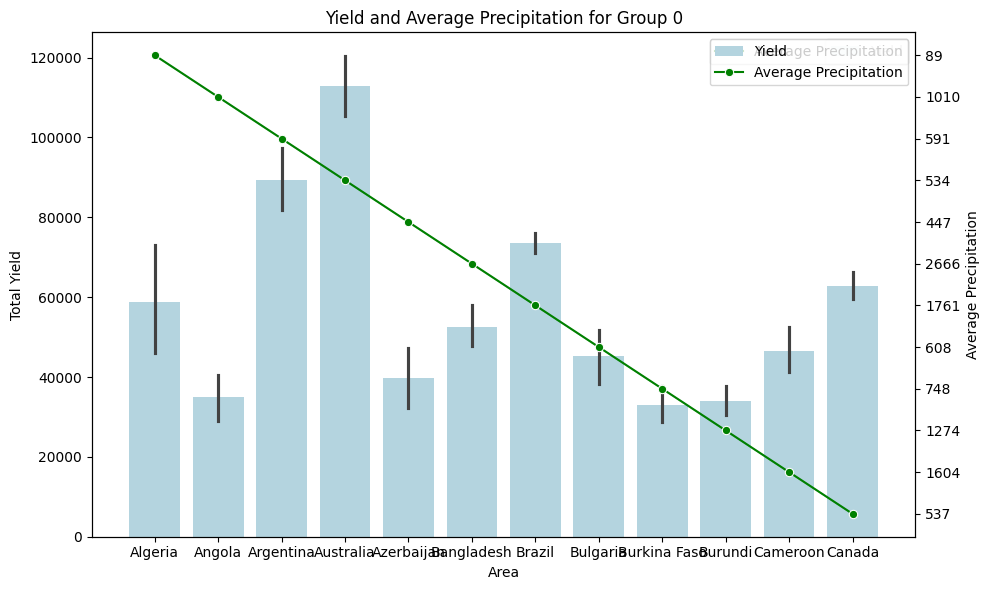

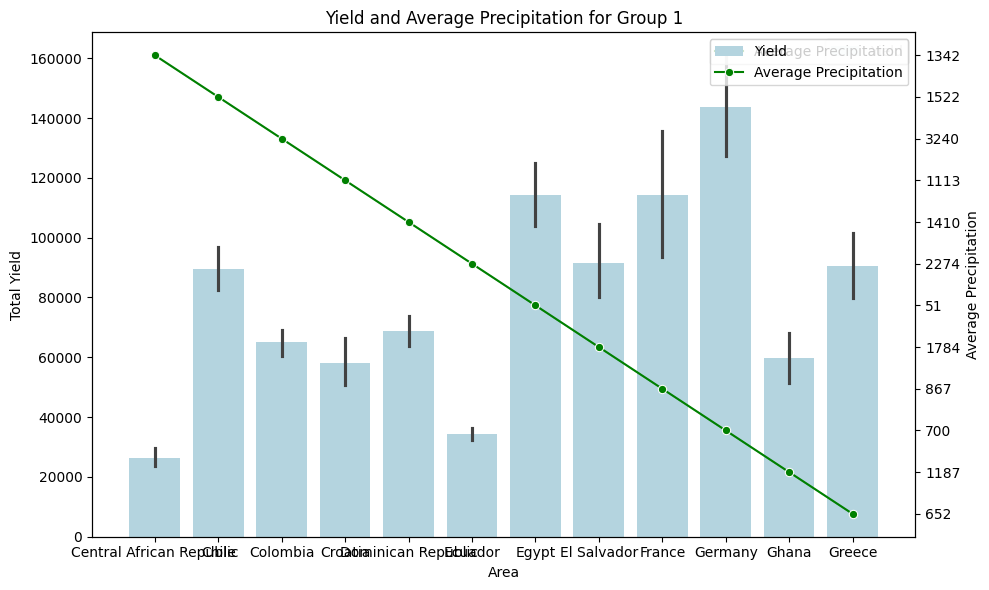

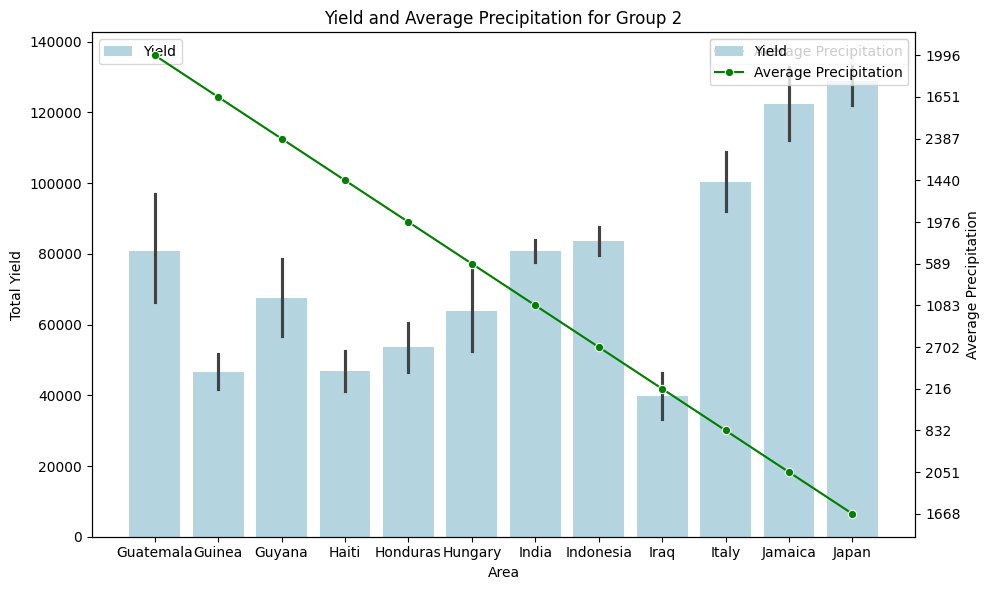

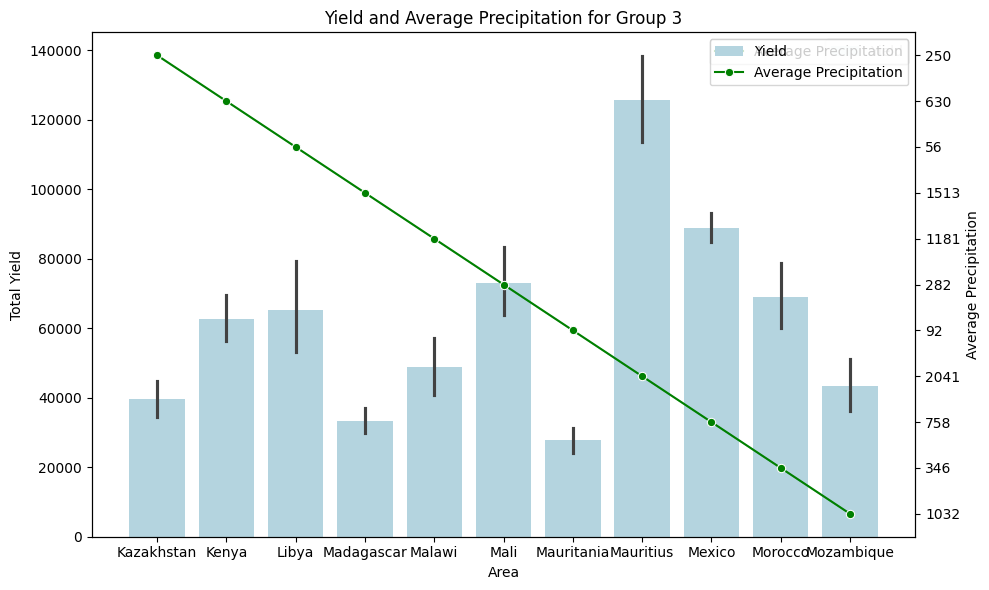

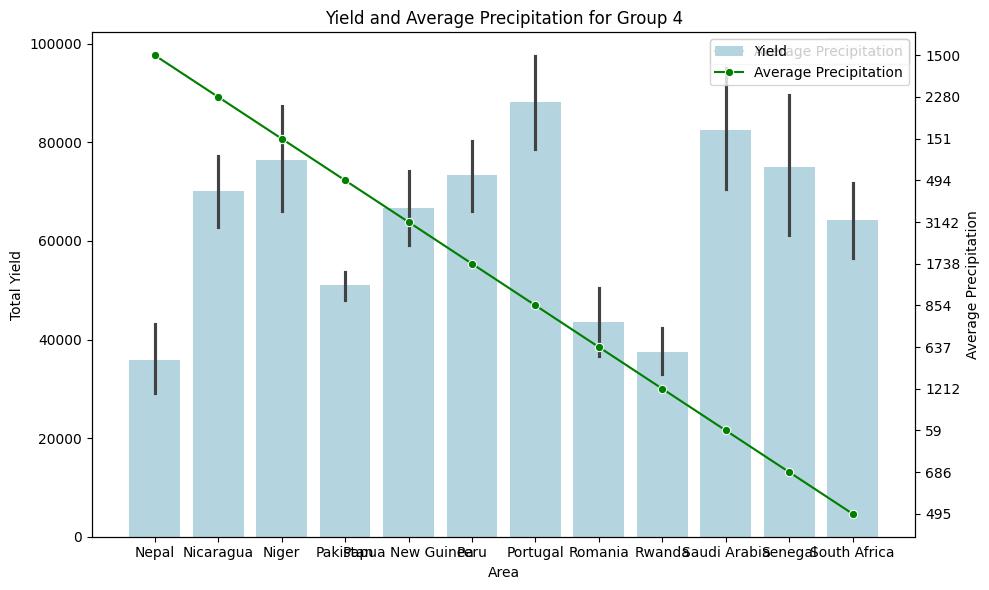

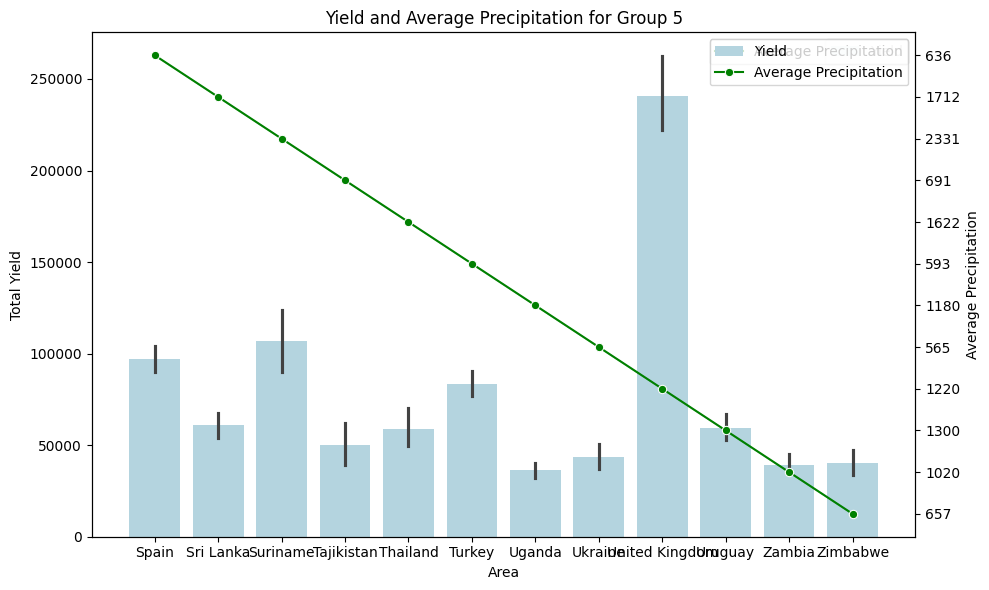

In [ ]:
# Loop through each group and create separate Yield and Precipitation plots
for group in df_yield['group'].unique():
    group_data = df_yield[df_yield['group'] == group]
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Bar plot for Yield in the group
    sns.barplot(x='Area', y='Yield', data=group_data, ax=ax1, color='lightblue', label='Yield')

    # Create a second y-axis for the average precipitation
    ax2 = ax1.twinx()

    # Line plot for average precipitation in the group
    sns.lineplot(x='Area', y='avg_precipitation', data=group_data, ax=ax2, color='green', marker='o', label='Average Precipitation')

    # Final plot adjustments
    ax1.set_title(f'Yield and Average Precipitation for Group {group}')
    ax1.set_ylabel('Total Yield')
    ax2.set_ylabel('Average Precipitation')
    ax1.set_xlabel('Area')
    fig.legend(loc='upper right', bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes)

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


From our graphs it is noted that larger precipitation does not equate to a higher yield. However, now we want to see if more pesticide use means more yield.

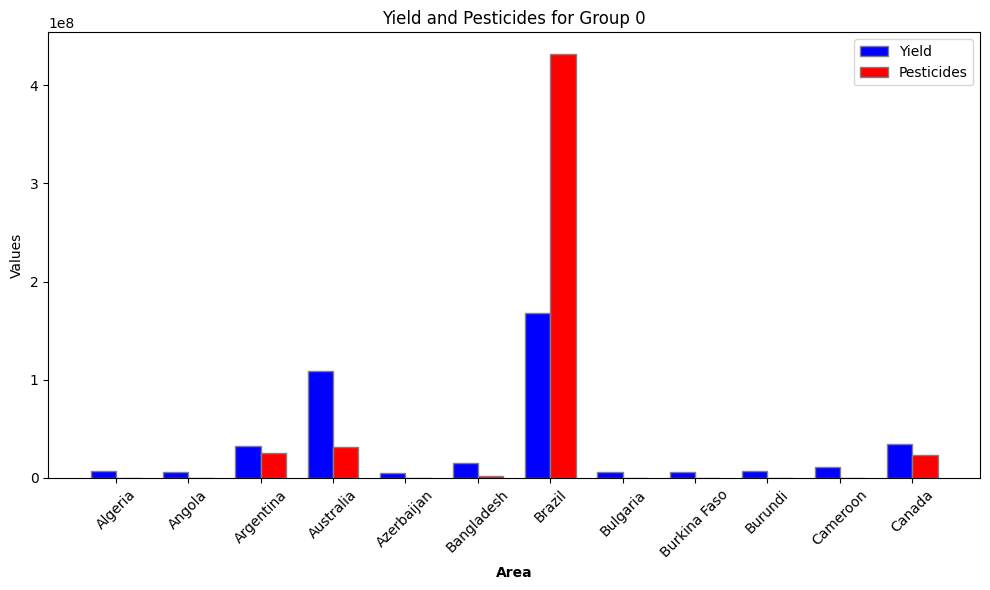

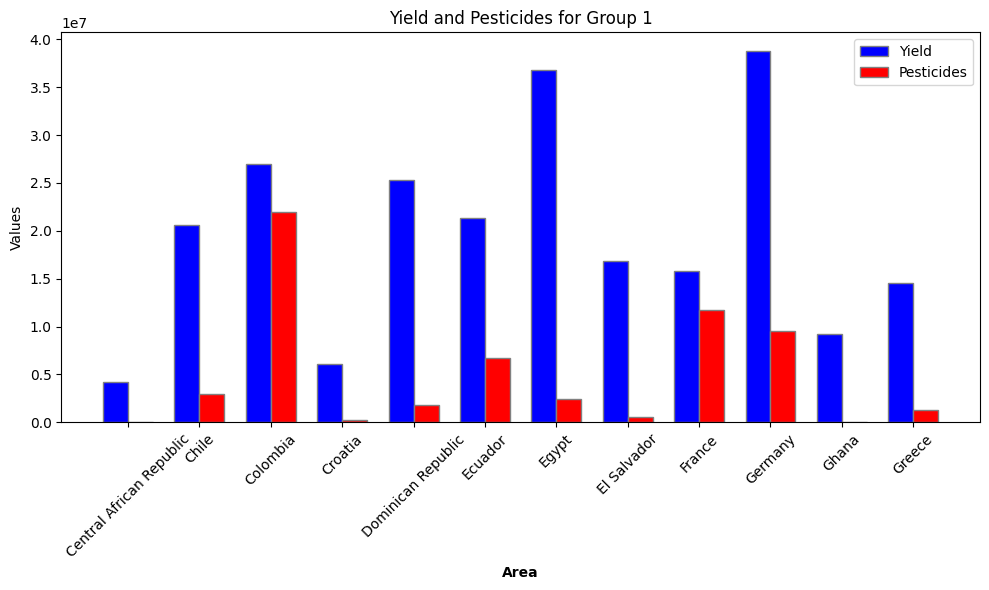

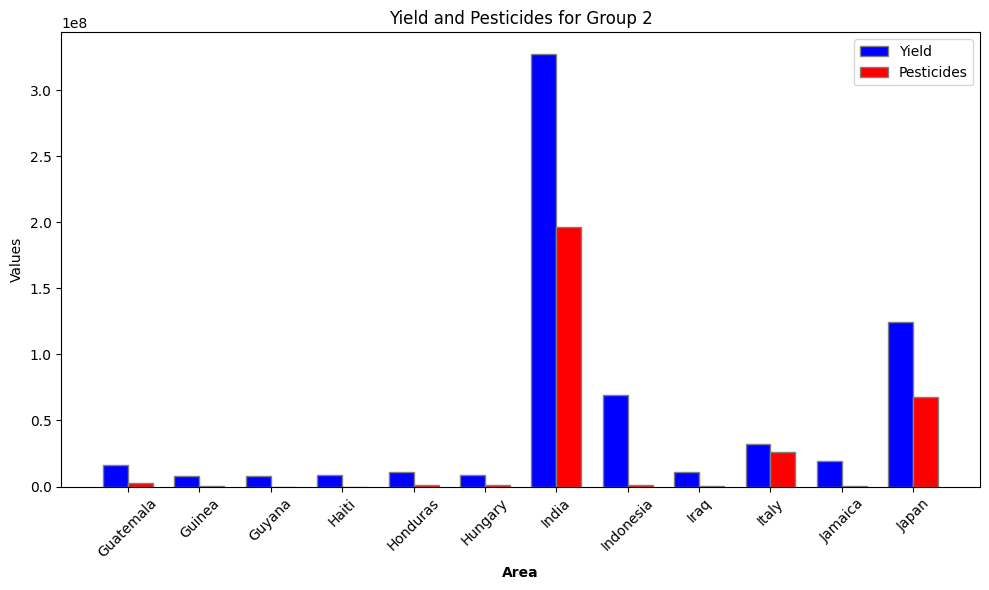

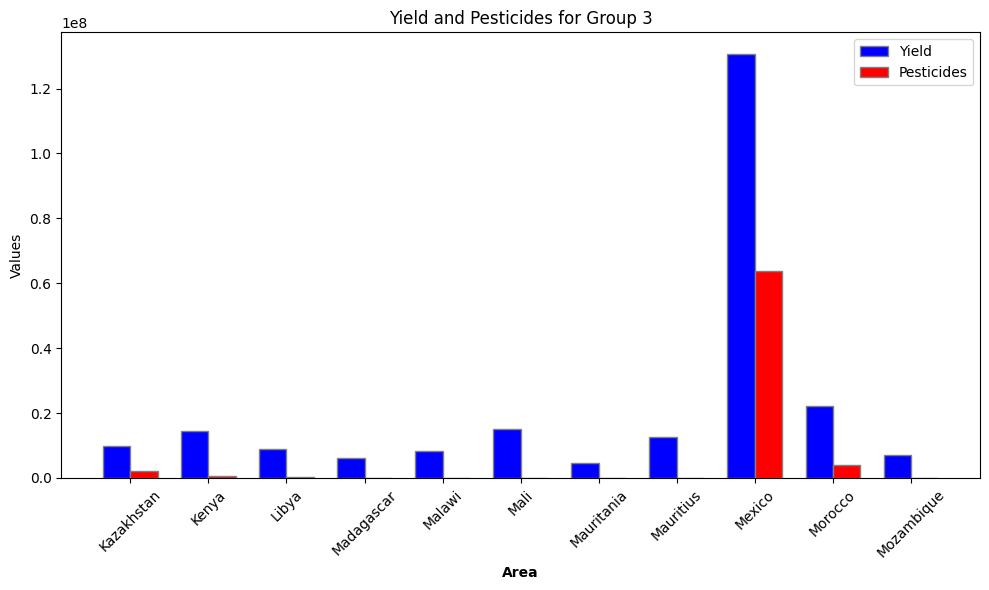

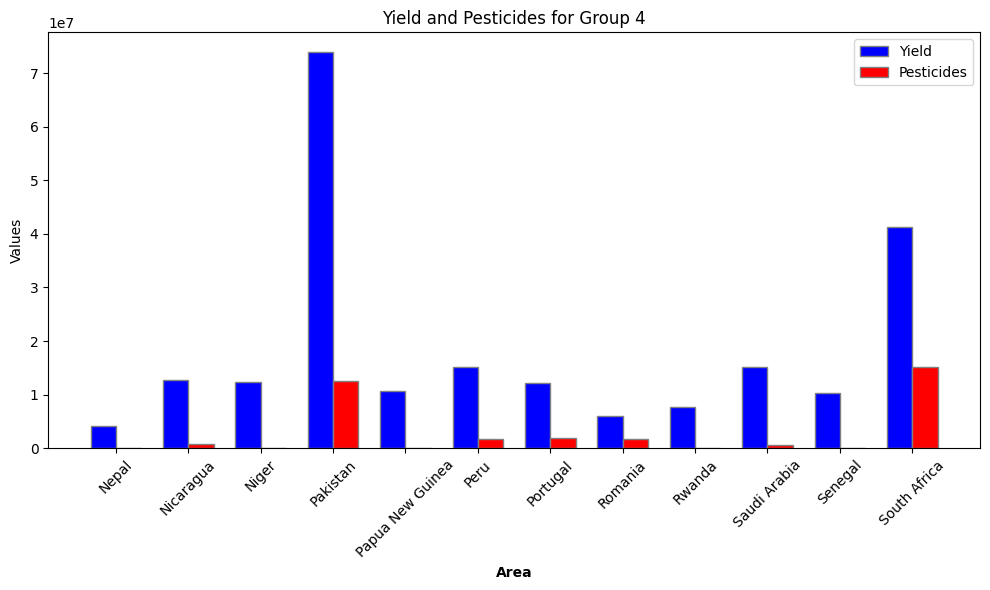

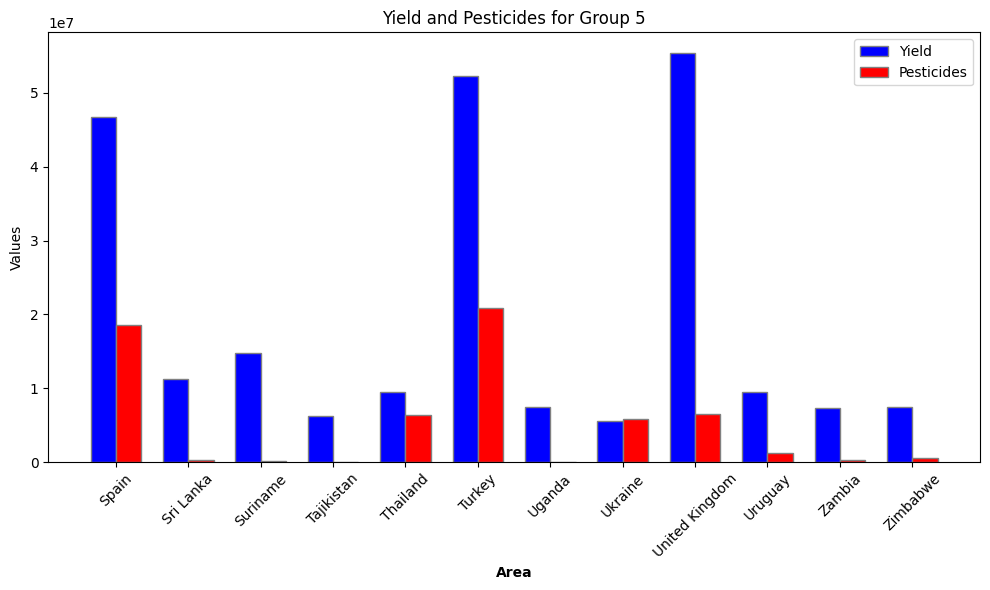

In [ ]:
# Define the bar width for the clustered bar chart
bar_width = 0.35

# Loop through each group and create separate clustered bar charts for Yield and Pesticides
for group in sorted(df_yield['group'].unique()):
    group_data = df_yield[df_yield['group'] == group]
    fig, ax = plt.subplots(figsize=(10, 6))

    # Set the positions of the bars on the x-axis
    areas = group_data['Area'].unique()
    r1 = range(len(areas))
    r2 = [x + bar_width for x in r1]

    # Calculate sum of Yield and Pesticides for each area within the group
    yield_sums = group_data.groupby('Area')['Yield'].sum()
    pesticide_sums = group_data.groupby('Area')['Pesticides'].sum()

    # Make the plots
    plt.bar(r1, yield_sums, color='blue', width=bar_width, edgecolor='grey', label='Yield')
    plt.bar(r2, pesticide_sums, color='red', width=bar_width, edgecolor='grey', label='Pesticides')

    # Add labels, title, and legend
    plt.xlabel('Area', fontweight='bold')
    plt.ylabel('Values')
    plt.title(f'Yield and Pesticides for Group {group}')
    plt.xticks([r + bar_width / 2 for r in range(len(r1))], areas, rotation=45)
    plt.legend()

    plt.tight_layout()
    plt.show()


It seems that more pesticide use does not always mean a higher yield. To be sure of this, we want to see the yield of crops based on pesticide usage.

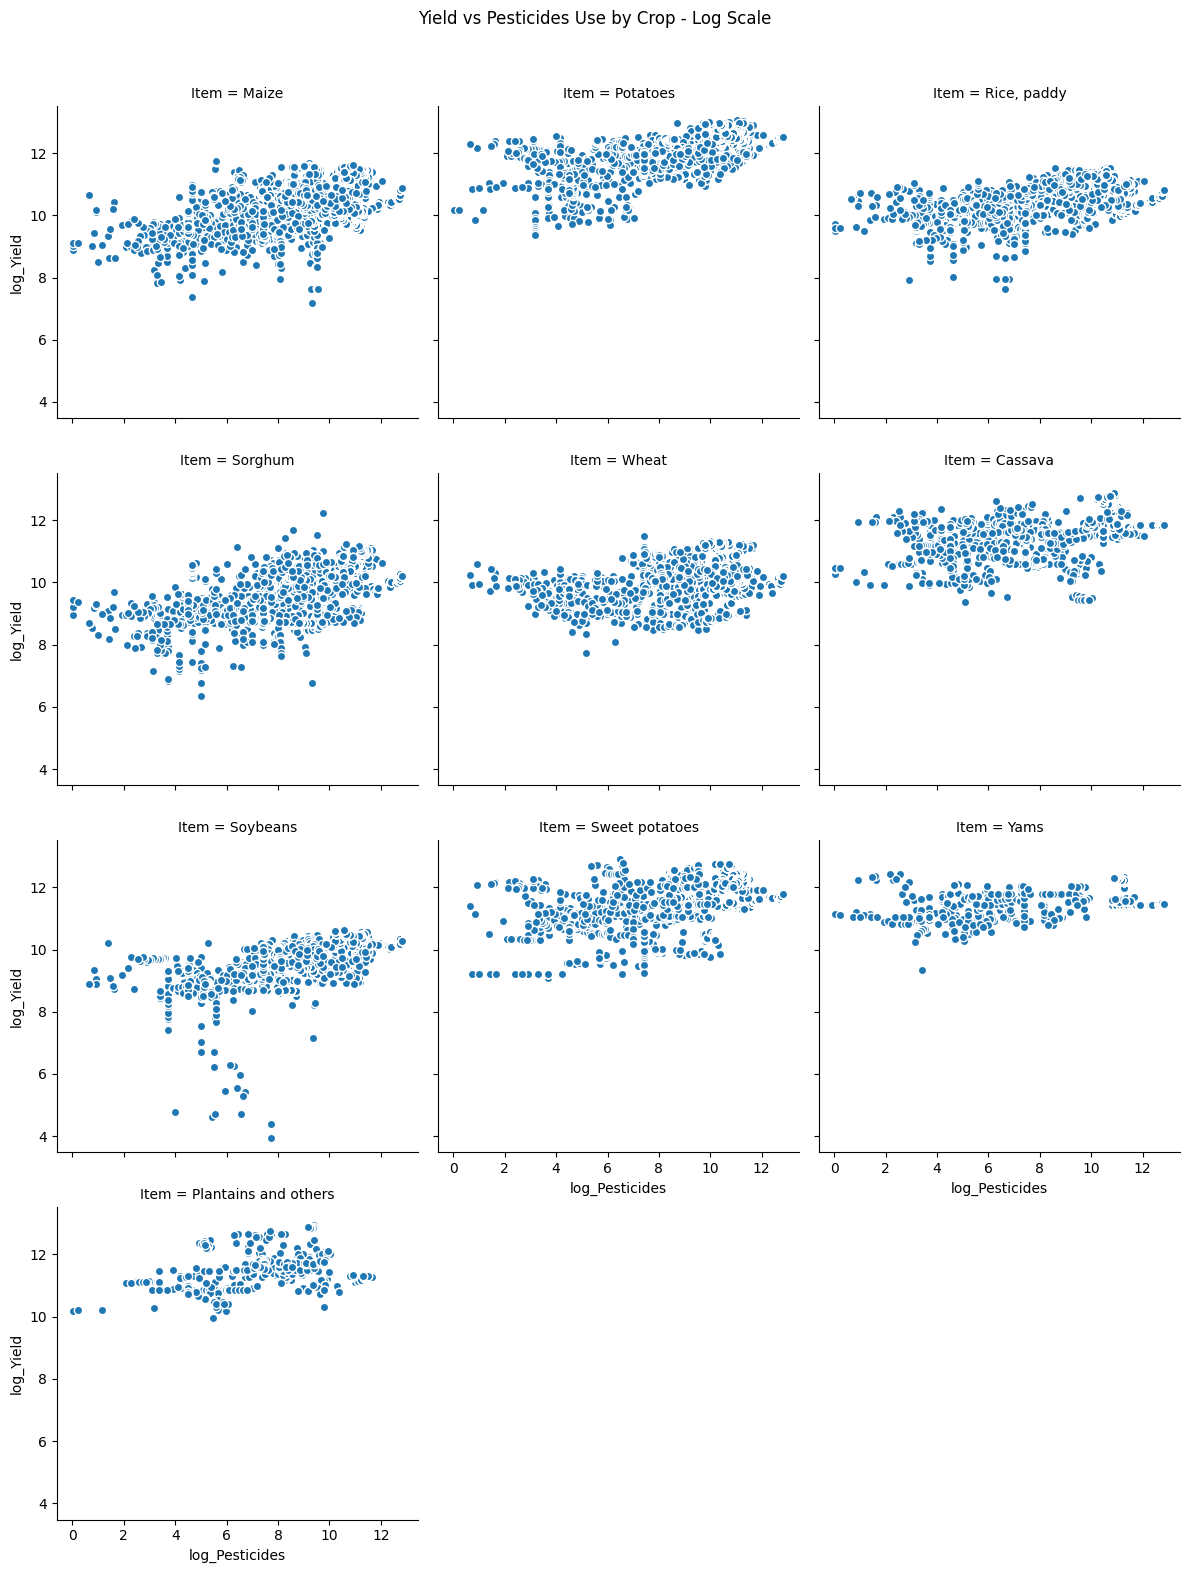

In [ ]:
# Convert to logarithmic scale for better visibility
df_yield['log_Yield'] = np.log1p(df_yield['Yield'])
df_yield['log_Pesticides'] = np.log1p(df_yield['Pesticides'])

# FacetGrid to create a grid of scatter plots
graph = sns.FacetGrid(df_yield, col='Item', col_wrap=3, height=4)
graph = graph.map(plt.scatter, 'log_Pesticides', 'log_Yield', edgecolor="w")

# Add a main title
plt.subplots_adjust(top=0.92)
graph.fig.suptitle('Yield vs Pesticides Use by Crop - Log Scale')

# Show the plot
plt.show()

The graphs do not show any significant correlations that would suggest a linear or logarthmic relation with pesticides and yield.

In [ ]:
# Create an interactive scatter plot
fig = px.scatter(df_yield, x='Pesticides', y='Yield', color='Item',
                 hover_data=['Item'], title='Yield vs Pesticides Use by Crop')

# Show the plot
fig.show()

The scatter plot shows the yield of each crop based on the amount of pesticides used. It is an interactive plot that shows that most crop  yields are contained in the lower portion of pesticide use. There are a few outliers in the higher range showing that crops can grow with the larger amount of pesticides but the highest yields are contained in the lower end.

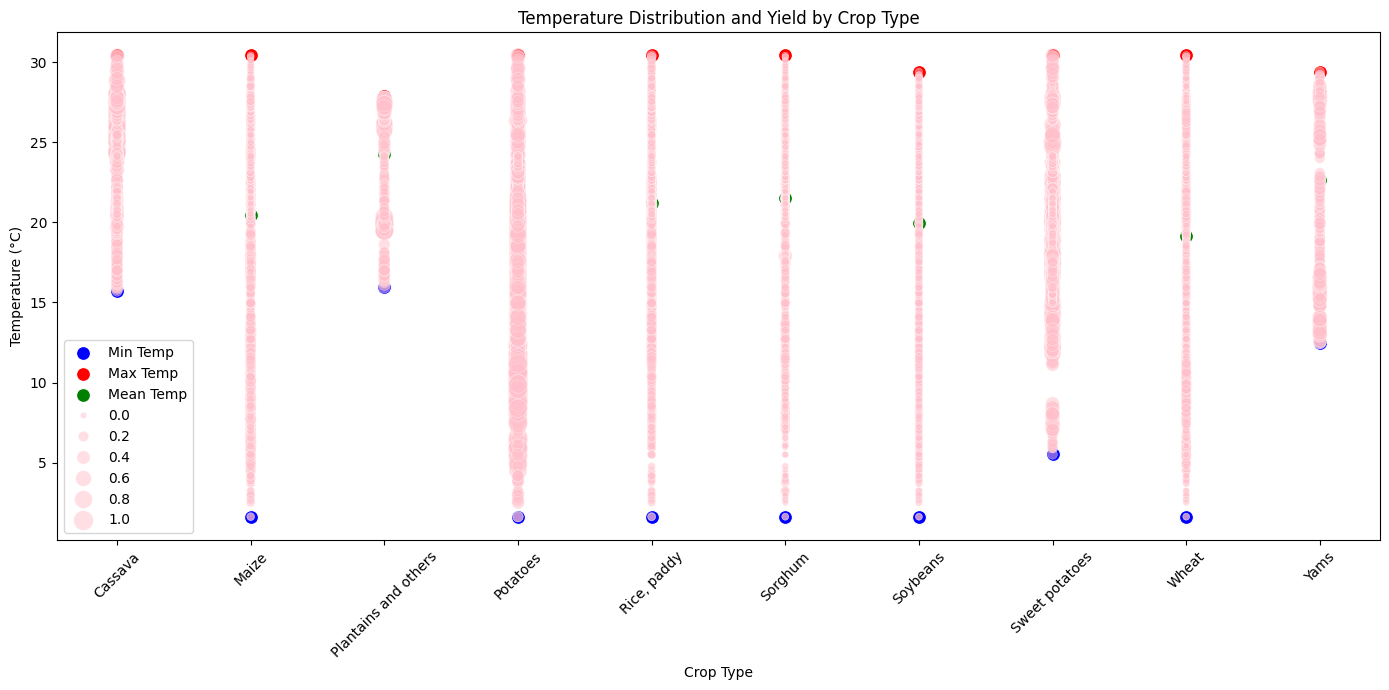

In [ ]:
# Calculate the minimum, maximum, and average temperatures for each crop
temp_stats = df_yield.groupby('Item')['avg_temp'].agg(['min', 'mean', 'max']).reset_index()

# Normalize the yield data to use for point sizes
df_yield['yield_normalized'] = (df_yield['Yield'] - df_yield['Yield'].min()) / (df_yield['Yield'].max() - df_yield['Yield'].min())

# Initialize the matplotlib figure
plt.figure(figsize=(14, 7))

# Plot the min and max temperatures
sns.scatterplot(data=temp_stats, x='Item', y='min', color='blue', label='Min Temp', s=100)
sns.scatterplot(data=temp_stats, x='Item', y='max', color='red', label='Max Temp', s=100)

# Plot the mean temperatures
sns.scatterplot(data=temp_stats, x='Item', y='mean', color='green', label='Mean Temp', s=100)

# Plot all the individual temperature observations to show distribution
# Size represents normalized yield
sns.scatterplot(x='Item', y='avg_temp', size='yield_normalized', sizes=(20, 200), data=df_yield, color='Pink', alpha=0.5)

# Improve the aesthetics
plt.xticks(rotation=45)
plt.title('Temperature Distribution and Yield by Crop Type')
plt.xlabel('Crop Type')
plt.ylabel('Temperature (°C)')

# Place the legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

The graph explains the temperature range of crops. The size of the circles represents where the larger yields are. From the image, we are able to see that crops such as Maize, Potatoes, Rice, Sorghum, Soybeans, and Wheat can grow in a wide area of temperatures. Plantains, Sweet Potatoes, Cassava, and Yams all have a smaller range typically on the higher end suggesting they are a warm climate plant.

## Modeling

### Linear Regression Model

In [ ]:
# Define the features and target variable
features = ['avg_temp', 'Pesticides', 'avg_precipitation', 'Item']
X = df_yield[features]
y = df_yield['Yield']

# Create a column transformer to apply OneHotEncoder to the 'Item' column
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), ['Item'])
    ],
    remainder='passthrough'
)

# Create a pipeline with the preprocessor and the LinearRegression model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Fit the pipeline to the data
pipeline.fit(X, y)

# Get the feature names after one-hot encoding
ohe = preprocessor.named_transformers_['onehot']
feature_names = ohe.get_feature_names_out(input_features=['Item'])
other_features = ['avg_temp', 'Pesticides', 'avg_precipitation']
all_features = list(feature_names) + other_features

# Get the coefficients for the features from the model
coefficients = pipeline.named_steps['model'].coef_

# Print out the features with their coefficients
feature_coefficients = dict(zip(all_features, coefficients))
for feature, coef in feature_coefficients.items():
    print(f'{feature}: {coef}')

# Print out the intercept
intercept = pipeline.named_steps['model'].intercept_
print(f'Intercept: {intercept}')

Item_Cassava: 73695.96877143015
Item_Maize: -50868.50836574428
Item_Plantains and others: 36334.20764518191
Item_Potatoes: 109284.63410712688
Item_Rice, paddy: -42678.077673002736
Item_Sorghum: -64885.536291974364
Item_Soybeans: -70272.39711769855
Item_Sweet potatoes: 37325.46222528351
Item_Wheat: -60791.03147952332
Item_Yams: 32855.278178980145
avg_temp: -1801.5550593997434
Pesticides: 0.11601221545424778
avg_precipitation: -6.987677816865926
Intercept: 125627.79637737936


The results of this code presented us with the coefficients and the intercepts. These figures are capable of being plugged into the formula to help determine yield.

In [ ]:
# Define the features and target variable
categorical_features = ['Item']
numerical_features = ['avg_temp', 'Pesticides', 'avg_precipitation']
features = numerical_features + categorical_features
X = df_yield[features]
y = df_yield['Yield']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a column transformer to apply OneHotEncoder to the 'Item' column
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'
)

# Define polynomial features with interaction only
poly_features = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

# Create a pipeline with the preprocessor, polynomial features, and a linear regression model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('polynomial_features', poly_features),
    ('linear_regression', LinearRegression())
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict and evaluate on training data
y_train_pred = pipeline.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train =  np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred)

# Predict and evaluate on testing data
y_test_pred = pipeline.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test =  np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Print the results for training data
print(f'Training Data - R-squared: {r2_train}, Mean Squared Error: {mse_train}, Root Mean Squared Error: {rmse_train}, Mean Absolute Error: {mae_train}')

# Print the results for testing data
print(f'Testing Data - R-squared: {r2_test}, Mean Squared Error: {mse_test}, Root Mean Squared Error: {rmse_test}, Mean Absolute Error: {mae_test}')

Training Data - R-squared: 0.7048069328406588, Mean Squared Error: 1995983297.9811924, Root Mean Squared Error: 44676.42888572443, Mean Absolute Error: 27337.679161790467
Testing Data - R-squared: 0.7008874945702619, Mean Squared Error: 2143732323.6363065, Root Mean Squared Error: 46300.457056451465, Mean Absolute Error: 28342.422508647993


The numbers above show how well a formula is performing. The R2 values are lower but close. The MSE, RMSE, and MAE are all relatively close suggesting the model does generalize well but does lack some ability to predict accurately.

## Preparing Data/Splitting Data for Models

In [ ]:
# Encoding Categorical Features
categorical_features = ['Item', 'Area']
numerical_features = ['Pesticides', 'avg_temp', 'avg_precipitation']

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'
)

X = df_yield[categorical_features + numerical_features]
y = df_yield['Yield']

# Splitting data
X_transformed = preprocessor.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

std_scaler = StandardScaler(with_mean=False)
X_train_scale = std_scaler.fit_transform(X_train)
# Scale test data for evaluation
X_test_scale = std_scaler.transform(X_test)

### Random Forest

In [ ]:
# Random Forest Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
rf = RandomForestRegressor(max_depth=None, min_samples_split=2, n_estimators=300, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# R-squared
rf_train_score = r2_score(y_train, y_train_pred)
rf_test_score = r2_score(y_test, y_test_pred)

# Mean Absolute Error (MAE)
rf_train_mae = mean_absolute_error(y_train, y_train_pred)
rf_test_mae = mean_absolute_error(y_test, y_test_pred)

# Mean Squared Error (MSE)
rf_train_mse = mean_squared_error(y_train, y_train_pred)
rf_test_mse = mean_squared_error(y_test, y_test_pred)

# Root Mean Squared Error (RMSE)
rf_train_rmse = np.sqrt(rf_train_mse)
rf_test_rmse = np.sqrt(rf_test_mse)

# Printing the results
print(f"Random Forest - Training R-squared: {rf_train_score}, Testing R-squared: {rf_test_score}")
print(f"Random Forest - Training MAE: {rf_train_mae}, Testing MAE: {rf_test_mae}")
print(f"Random Forest - Training MSE: {rf_train_mse}, Testing MSE: {rf_test_mse}")
print(f"Random Forest - Training RMSE: {rf_train_rmse}, Testing RMSE: {rf_test_rmse}")

Random Forest - Training R-squared: 0.9965599544477141, Testing R-squared: 0.9758312724007356
Random Forest - Training MAE: 1851.4930311676956, Testing MAE: 4850.439127472122
Random Forest - Training MSE: 23260280.238732122, Testing MSE: 173216704.86917984
Random Forest - Training RMSE: 4822.891273782991, Testing RMSE: 13161.181742882356


The results of the Random Forest show a very high predictibility with high R2 values. It does show some overfitting as the test set contains higher values for MAE, MSE, and RMSE while the R2 value is lower.

### Gradient Boost

In [ ]:
# Gradient Boosting Best Parameters: {'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 300}
gb = GradientBoostingRegressor(n_estimators=300, learning_rate=0.2, max_depth=10, random_state=42)
gb.fit(X_train, y_train)

# Predictions
y_train_pred = gb.predict(X_train)
y_test_pred = gb.predict(X_test)

# R-squared
gb_train_score = r2_score(y_train, y_train_pred)
gb_test_score = r2_score(y_test, y_test_pred)

# Mean Absolute Error (MAE)
gb_train_mae = mean_absolute_error(y_train, y_train_pred)
gb_test_mae = mean_absolute_error(y_test, y_test_pred)

# Mean Squared Error (MSE)
gb_train_mse = mean_squared_error(y_train, y_train_pred)
gb_test_mse = mean_squared_error(y_test, y_test_pred)

# Root Mean Squared Error (RMSE)
gb_train_rmse = np.sqrt(gb_train_mse)
gb_test_rmse = np.sqrt(gb_test_mse)

# Printing the results
print(f"Gradient Boosting - Training R-squared: {gb_train_score}, Testing R-squared: {gb_test_score}")
print(f"Gradient Boosting - Training MAE: {gb_train_mae}, Testing MAE: {gb_test_mae}")
print(f"Gradient Boosting - Training MSE: {gb_train_mse}, Testing MSE: {gb_test_mse}")
print(f"Gradient Boosting - Training RMSE: {gb_train_rmse}, Testing RMSE: {gb_test_rmse}")

Gradient Boosting - Training R-squared: 0.9992963295638275, Testing R-squared: 0.9761191047573428
Gradient Boosting - Training MAE: 919.8860287153361, Testing MAE: 4710.912960170276
Gradient Boosting - Training MSE: 4757951.978341505, Testing MSE: 171153817.1080658
Gradient Boosting - Training RMSE: 2181.273017836489, Testing RMSE: 13082.576852748307


The scores from the Gradient Boost show some of the best. The R2 value on the test set drops slightly and the MAE, MSE, and RMSE do raise suggesting some overfitting but it is a relatively close range.

### Decision Tree

In [ ]:
# Decision Tree Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
dt = DecisionTreeRegressor(max_depth=None, min_samples_leaf=1, min_samples_split=5, random_state=42)
dt.fit(X_train, y_train)

# Predictions
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

# R-squared
dt_train_score = r2_score(y_train, y_train_pred)
dt_test_score = r2_score(y_test, y_test_pred)

# Mean Absolute Error (MAE)
dt_train_mae = mean_absolute_error(y_train, y_train_pred)
dt_test_mae = mean_absolute_error(y_test, y_test_pred)

# Mean Squared Error (MSE)
dt_train_mse = mean_squared_error(y_train, y_train_pred)
dt_test_mse = mean_squared_error(y_test, y_test_pred)

# Root Mean Squared Error (RMSE)
dt_train_rmse = np.sqrt(dt_train_mse)
dt_test_rmse = np.sqrt(dt_test_mse)

# Printing the results
print(f"Decision Tree - Training R-squared: {dt_train_score}, Testing R-squared: {dt_test_score}")
print(f"Decision Tree - Training MAE: {dt_train_mae}, Testing MAE: {dt_test_mae}")
print(f"Decision Tree - Training MSE: {dt_train_mse}, Testing MSE: {dt_test_mse}")
print(f"Decision Tree - Training RMSE: {dt_train_rmse}, Testing RMSE: {dt_test_rmse}")

Decision Tree - Training R-squared: 0.9964629036577092, Testing R-squared: 0.9702829605022418
Decision Tree - Training MAE: 1440.1790654561012, Testing MAE: 4869.458428390368
Decision Tree - Training MSE: 23916500.78540587, Testing MSE: 212981326.3494112
Decision Tree - Training RMSE: 4890.4499573562625, Testing RMSE: 14593.879756576425


The decision tree shows promising R2 values but does have higher MAE, MSE, and RMSE on the training set and test set. These indicate a higher overfit than the Gradient Boost.

### K-Nearest Neighbors

In [ ]:
# K-Nearest Neighbors Best Parameters: {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}
knn = KNeighborsRegressor(algorithm= 'auto', n_neighbors=3, weights= 'distance')
knn.fit(X_train, y_train)

# Predictions
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# R-squared
knn_train_score = r2_score(y_train, y_train_pred)
knn_test_score = r2_score(y_test, y_test_pred)

# Mean Absolute Error (MAE)
knn_train_mae = mean_absolute_error(y_train, y_train_pred)
knn_test_mae = mean_absolute_error(y_test, y_test_pred)

# Mean Squared Error (MSE)
knn_train_mse = mean_squared_error(y_train, y_train_pred)
knn_test_mse = mean_squared_error(y_test, y_test_pred)

# Root Mean Squared Error (RMSE)
knn_train_rmse = np.sqrt(knn_train_mse)
knn_test_rmse = np.sqrt(knn_test_mse)

# Printing the results
print(f"K-Nearest Neighbors - Training R-squared: {knn_train_score}, Testing R-squared: {knn_test_score}")
print(f"K-Nearest Neighbors - Training MAE: {knn_train_mae}, Testing MAE: {knn_test_mae}")
print(f"K-Nearest Neighbors - Training MSE: {knn_train_mse}, Testing MSE: {knn_test_mse}")
print(f"K-Nearest Neighbors - Training RMSE: {knn_train_rmse}, Testing RMSE: {knn_test_rmse}")

K-Nearest Neighbors - Training R-squared: 0.9995540753161548, Testing R-squared: 0.5736752421417279
K-Nearest Neighbors - Training MAE: 162.07196843656416, Testing MAE: 29205.770212918756
K-Nearest Neighbors - Training MSE: 3015173.1870857165, Testing MSE: 3055459558.5167923
K-Nearest Neighbors - Training RMSE: 1736.4254049874173, Testing RMSE: 55276.21150654947


The K-Nearest model performed almost perfectly on the training set but is way overfit as the scores dropped significantly on the test set.

### Neural Network

In [ ]:
# Buidling the Model
nn_model = MLPRegressor(hidden_layer_sizes=(250), max_iter=1000, random_state=42)

# Training the model
nn_model.fit(X_train, y_train)

# Predicting and evaluating the model
y_train_pred = nn_model.predict(X_train)
y_test_pred = nn_model.predict(X_test)

# R-squared
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Mean Absolute Error (MAE)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# Mean Squared Error (MSE)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Root Mean Squared Error (RMSE)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

# Printing the results
print(f"Neural Network - Training R-squared: {train_r2}, Testing R-squared: {test_r2}")
print(f"Neural Network - Training MAE: {train_mae}, Testing MAE: {test_mae}")
print(f"Neural Network - Training MSE: {train_mse}, Testing MSE: {test_mse}")
print(f"Neural Network - Training RMSE: {train_rmse}, Testing RMSE: {test_rmse}")

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning:

Training interrupted by user.



Neural Network - Training R-squared: 0.7624845015396596, Testing R-squared: 0.7527458865524694
Neural Network - Training MAE: 26113.929468696875, Testing MAE: 27265.013430523788
Neural Network - Training MSE: 1605989505.4466736, Testing MSE: 1772064442.4009817
Neural Network - Training RMSE: 40074.79888217374, Testing RMSE: 42095.8957904566


The Neural Network performed as a consisent model suggesting that it can generalize information well but the numbers are higher than the other models and the R2 is lower.

### Determine Optimal Hyperparamters

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from math import sqrt

def perform_grid_search(estimator, param_grid, model_name, X_train, y_train, X_test, y_test, cv=5):
    # Create GridSearchCV object
    grid_search = GridSearchCV(
        estimator=estimator,
        param_grid=param_grid,
        cv=cv,
        scoring='neg_mean_absolute_error',
        n_jobs=-1
    )

    # Fit the grid search
    grid_search.fit(X_train, y_train)

    # Get the best estimator and make predictions
    best_estimator = grid_search.best_estimator_
    predictions = best_estimator.predict(X_test)

    # Calculate metrics
    best_mae = -grid_search.best_score_  # neg_mean_absolute_error is returned negative by GridSearchCV
    mse = mean_squared_error(y_test, predictions)
    rmse = sqrt(mse)
    r2 = r2_score(y_test, predictions)

    # Print results
    print(f"{model_name} Best Parameters: {grid_search.best_params_}")
    print(f"{model_name} Best MAE: {best_mae:.4f}")
    print(f"{model_name} Test MSE: {mse:.4f}")
    print(f"{model_name} Test RMSE: {rmse:.4f}")
    print(f"{model_name} Test R-squared: {r2:.4f}")
    print("-" * 50)

    return best_estimator, grid_search

# Random Forest Grid Search
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
rf_best, rf_grid = perform_grid_search(
    RandomForestRegressor(random_state=42),
    rf_params,
    'Random Forest',
    X_train, y_train, X_test, y_test
)

# Gradient Boosting Grid Search
gb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10]
}
gb_best, gb_grid = perform_grid_search(
    GradientBoostingRegressor(random_state=42),
    gb_params,
    'Gradient Boosting',
    X_train, y_train, X_test, y_test
)

# Decision Tree Grid Search
dt_params = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dt_best, dt_grid = perform_grid_search(
    DecisionTreeRegressor(random_state=42),
    dt_params,
    'Decision Tree',
    X_train, y_train, X_test, y_test
)

# K-Nearest Neighbors Grid Search
knn_params = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
knn_best, knn_grid = perform_grid_search(
    KNeighborsRegressor(),
    knn_params,
    'K-Nearest Neighbors',
    X_train, y_train, X_test, y_test
)

# Neural Network Grid Search (reduced parameter grid for faster execution)
nn_params = {
    'hidden_layer_sizes': [(50,), (100,), (50,50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'lbfgs'],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [500, 1000]
}

nn_best, nn_grid = perform_grid_search(
    MLPRegressor(random_state=42),
    nn_params,
    'Neural Network',
    X_train, y_train, X_test, y_test
)

Random Forest Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
Random Forest Best MAE: 5234.2317
Random Forest Test MSE: 173216704.8692
Random Forest Test RMSE: 13161.1817
Random Forest Test R-squared: 0.9758
--------------------------------------------------
Gradient Boosting Best Parameters: {'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 300}
Gradient Boosting Best MAE: 5093.8854
Gradient Boosting Test MSE: 171153817.1081
Gradient Boosting Test RMSE: 13082.5769
Gradient Boosting Test R-squared: 0.9761
--------------------------------------------------
Decision Tree Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree Best MAE: 5510.4439
Decision Tree Test MSE: 229932272.9743
Decision Tree Test RMSE: 15163.5178
Decision Tree Test R-squared: 0.9679
--------------------------------------------------
K-Nearest Neighbors Best Parameters: {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}
K-N

KeyboardInterrupt: 

These results give optimal performance metrics to tune each of the hyperparameters to.

### Models Performance

|Model |Set  |MAE |RMSE |MSE |R^2 |
|---|---|---:|---:|---:|---|
|Random Forest|Training| 1847.07| 4804.71| 23085255.50| 0.996 |
|              | Test    | 4617.85|12087.54|146108829.92|0.978 |
|Gradient Boosting| Training| 940.24| 2098.54 | 4403874.27|  0.999 |
| | Test | 19008.43 | 11892.89| 141440936.93|0.978 |
| Decision Tree | Training | 1510.57 | 5174.75 | 26778126.02 | 0.996 |
| | Test | 4869.18 | 13837.34 | 191472181.04 | 0.971|
| K_Nearest | Training | 144.19| 1614.77 | 2607486.06 | 0.999|
| | Test | 28741.47 | 54523.71 | 2972835842.96 | 0.555 |
| Neural Network | Training | 25961.33 | 39646.89 | 1571876351.55 | 0.771 |
| | Test | 26146.88 | 39810.19 | 1584851962.55 | 0.762 |
| Linear Regression | Training | 27565.79| 45027.95| 2027516959.43 | .705|
| | Test | 27570.11 | 44948.42 | 2020360951.03 | 0.697 |

Comparing each models performance against each other. Gradient Boost has the best performance metrics of all models.

## Model Analysis

### Model Interpretation with Feature Importance

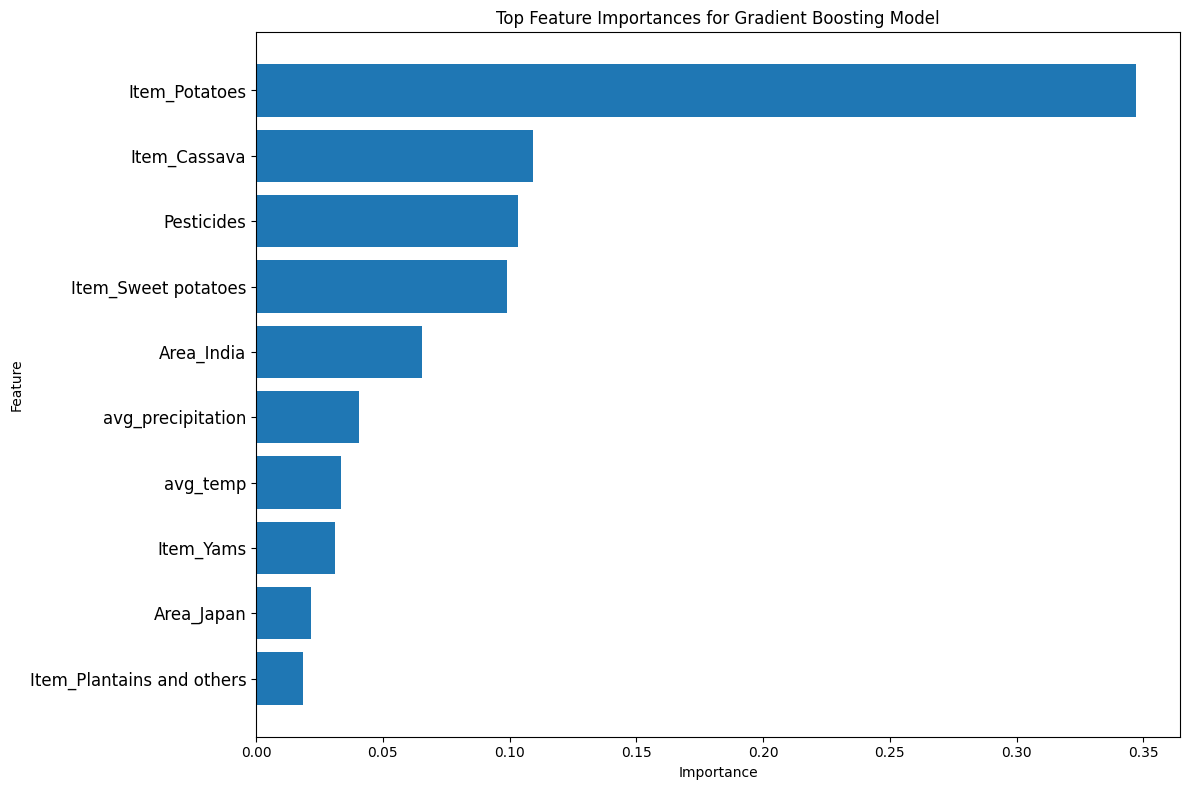

In [ ]:
# Bring in One Hot Encoder Features
ohe_feature_names = preprocessor.named_transformers_['onehot'].get_feature_names_out(categorical_features)

# Combine the one-hot encoded feature names with the numerical feature names
full_feature_names = np.concatenate((ohe_feature_names, numerical_features))

feature_importance = gb.feature_importances_

# Ensure the length of `full_feature_names` matches the number of features in `feature_importance`
assert len(full_feature_names) == len(feature_importance), "Mismatch in the number of features and importances."

# Sort the feature importances and get the indices for the top features
sorted_indices = np.argsort(feature_importance)[::-1]

top_n = min(len(full_feature_names), 10)
sorted_indices_top = sorted_indices[:top_n]

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(range(top_n), feature_importance[sorted_indices_top], align='center')
plt.yticks(range(top_n), full_feature_names[sorted_indices_top], fontsize=12)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top Feature Importances for Gradient Boosting Model')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### Permutation Feature

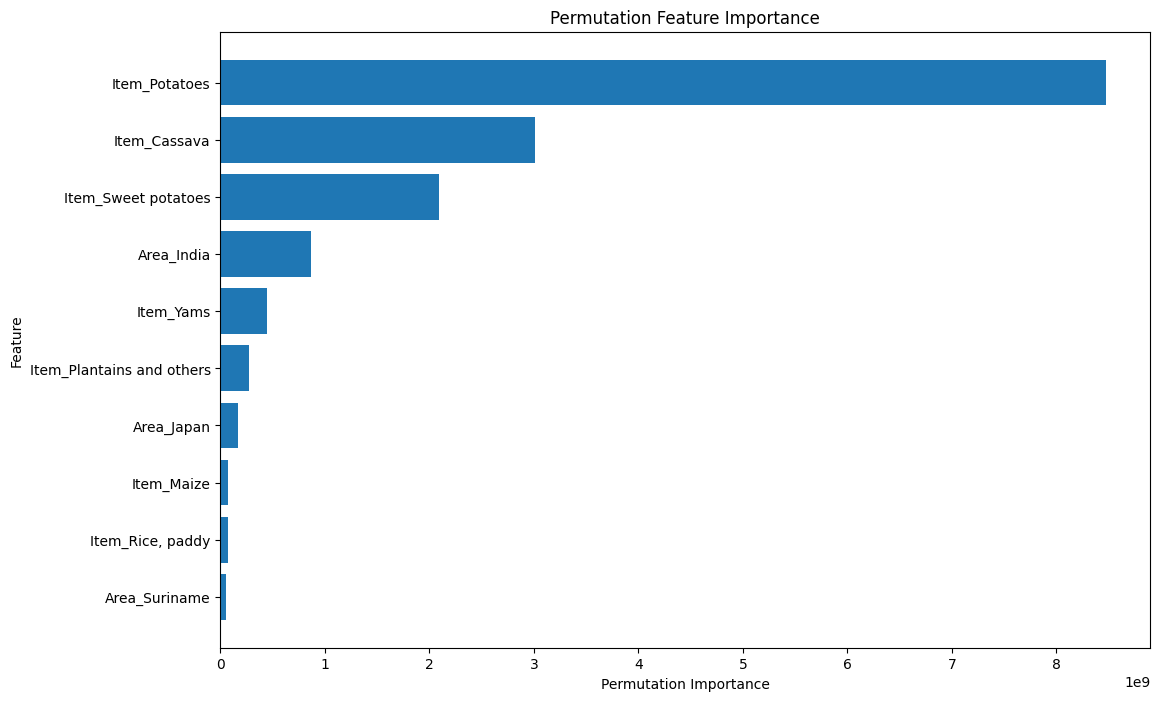

In [ ]:
# Convert the sparse matrix to a dense array
X_test_dense = X_test_scale.toarray()

# Perform permutation importance
results = permutation_importance(gb, X_test_dense, y_test, n_repeats=10, random_state=42, scoring='neg_mean_squared_error')

# Get importance scores
importance_scores = results.importances_mean

# Retrieve feature names from the ColumnTransformer
ohe_feature_names = preprocessor.named_transformers_['onehot'].get_feature_names_out(categorical_features)
full_feature_names = np.concatenate((ohe_feature_names, numerical_features))

# Summarize feature importances in a DataFrame
perm_importance_df = pd.DataFrame({'Feature': full_feature_names, 'Importance': importance_scores})
perm_importance_df = perm_importance_df.sort_values(by='Importance', ascending=False)

# Plot permutation importances
plt.figure(figsize=(12, 8))
plt.barh(perm_importance_df['Feature'].head(10), perm_importance_df['Importance'].head(10))
plt.xlabel('Permutation Importance')
plt.ylabel('Feature')
plt.title('Permutation Feature Importance')
plt.gca().invert_yaxis()
plt.show()

Both feature tests show different results. The regular model shows the importance of Region, Crop, and Climactic effects. The permutation model adjusts the values of different features to see which play the biggest factor. Crops and Region are the biggest impacts showing that crops have a higher tolerance of climactic changes.

### Cross-Validation

In [ ]:
# Perform cross-validation
cv_scores = cross_val_score(gb, X_train_scale, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculate RMSE for each fold
cv_rmse_scores = [np.sqrt(-score) for score in cv_scores]

print("Cross-validation RMSE scores:", cv_rmse_scores)
print("Mean CV RMSE:", np.mean(cv_rmse_scores))
print("Standard deviation in CV RMSE:", np.std(cv_rmse_scores))

Cross-validation RMSE scores: [np.float64(12680.859598606128), np.float64(13370.13288546217), np.float64(13301.9432165148), np.float64(13866.0922433567), np.float64(12222.028876300348)]
Mean CV RMSE: 13088.21136404803
Standard deviation in CV RMSE: 573.8409665192553


### Learning Curve

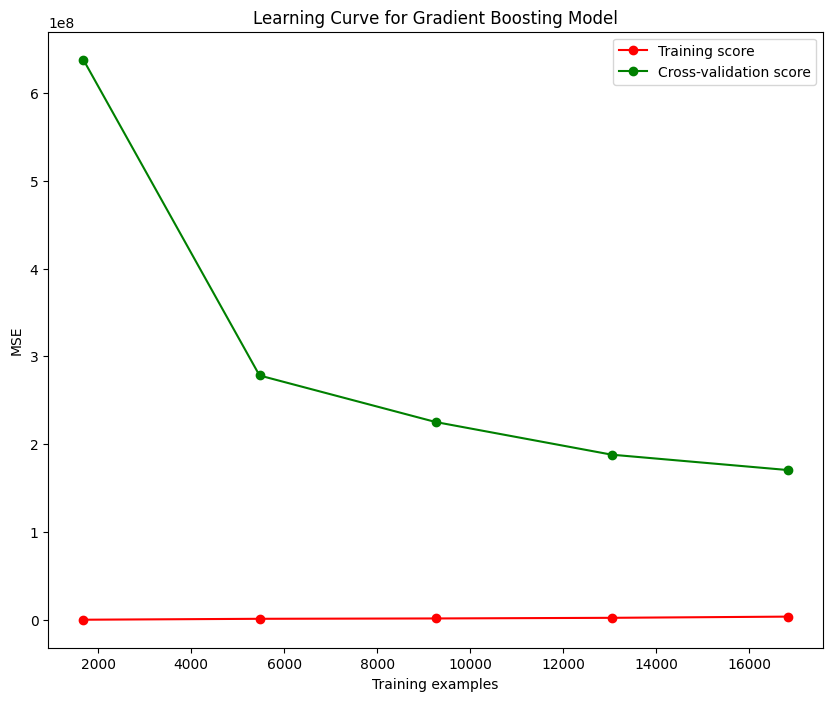

In [ ]:
# Build Learning Curve Model
train_sizes, train_scores, test_scores = learning_curve(
    gb, X_train_scale, y_train, cv=5, scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 5))

# Calculate training and testing scores
train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

# Plot learning curves
plt.figure(figsize=(10, 8))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.xlabel("Training examples")
plt.ylabel("MSE")
plt.title("Learning Curve for Gradient Boosting Model")
plt.legend(loc="best")
plt.show()

The CV model and learning curve model show how well the model performs after being cross validated. The learning curve shows whether a model will perform better on a smaller or larger amount of data. As evidenced, the model performs better on more data but still has a gap suggesting that it has room to be adjusted.

### Scatter Plot

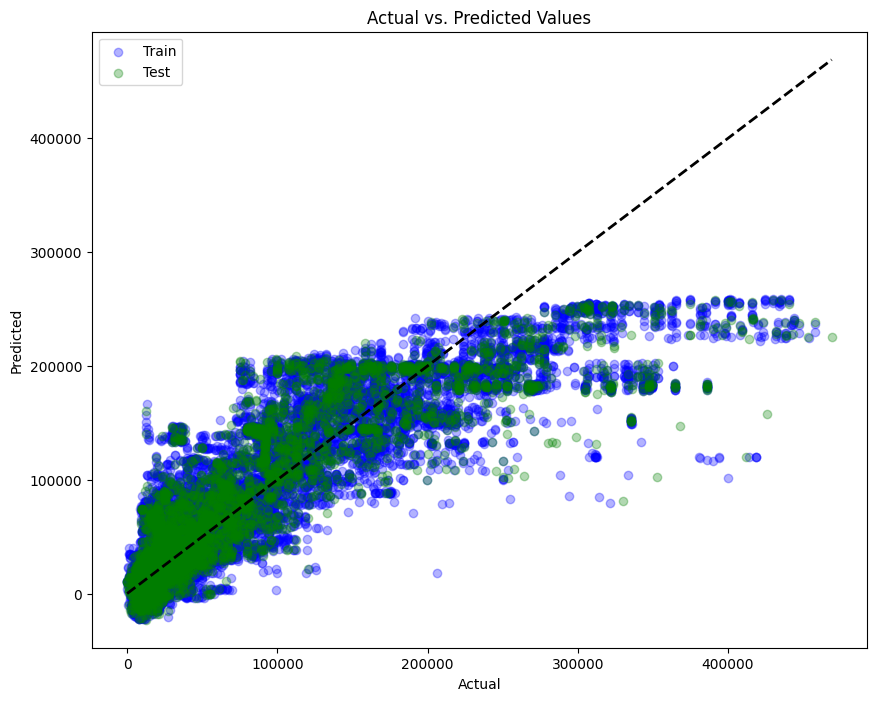

In [ ]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 8))
plt.scatter(y_train, y_train_pred, alpha=0.3, label='Train', color='blue')  # Plot training data
plt.scatter(y_test, y_test_pred, alpha=0.3, label='Test', color='green')  # Plot test data

# Plot a diagonal line representing perfect predictions
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

### Residual Plot

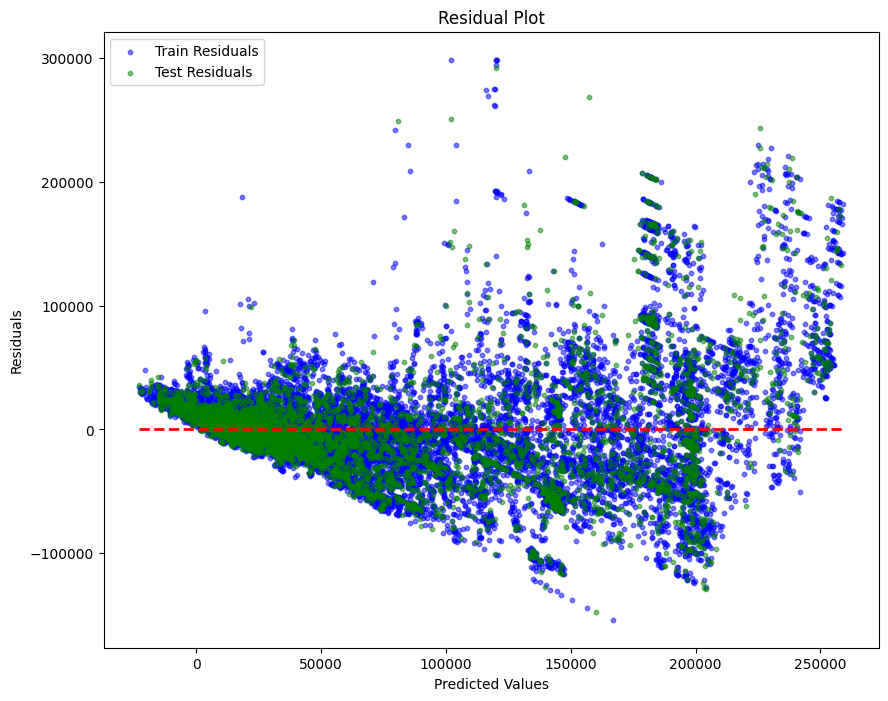

In [ ]:
# Calculate residuals
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

plt.figure(figsize=(10, 8))

# Scatter plot for training residuals
plt.scatter(y_train_pred, train_residuals, color='blue', s=10, alpha=0.5, label='Train Residuals')

# Scatter plot for testing residuals
plt.scatter(y_test_pred, test_residuals, color='green', s=10, alpha=0.5, label='Test Residuals')

plt.hlines(y=0, xmin=min(y_train_pred.min(), y_test_pred.min()), xmax=max(y_train_pred.max(), y_test_pred.max()), colors='red', linestyles='--', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend(loc='upper left')
plt.show()

In both models, scatter plots are created to test how well a model does against predicted versus actual values. The line whether diaganol or horizontal, represent the area which we want the data to fall. The closer to the line, the better the predictions are. Both models show a close relationship to the line in the lower end but get further off as the values get larger. Both models suggest overfitting the data.

## Conclusions

This project utilized 6 different regression methods to attempt to predict the yield for 10 different crops using information on crop yield, pesticide use, average precipitation, average temperature, and crop type. The Gradient Boost method was chosen for the higher recall on unseen data and that it generalized the information between training and test sets better than all other models used. The model was tuned to provide the best possible results which led to an impressive 99.9% accuracy rating on the training set and a 97.8% accuracy on the test set. Furthermore, the model showed the lowest variance in the Mean Absolute Error, Mean Squared Error, and Root Mean Squared Error, showing the ability to generalize the data better than all other models used. Given the same information that this model was trained on, it would be suitable to provide a prediction on the yield you could expect from each crop

## References

1. [Databank, T.W.: Climate change overview: Country summary](https://www.fao.org/faostat/en/data) (2023), accessed on October 20, 2023
2. [Food, of the United Nations, A.O.: Faostat](https://www.fao.org/faostat/en/) (2023), accessed on October 20, 2023
3. [Geopard: Predicting crop yield with remote sensing data](https://geopard.tech/blog/predicting-crop-yield-with-remote-sensing-data/) (2023), accessed: 2023-11-21
4. [Jupyter, P.: Project Jupyter: Open source software for interactive computing](https://jupyter.org/) (2023), accessed: 2023-11-02
5. [OECD: Crop Production](https://data.oecd.org/agroutput/crop-production.html) (2023), accessed on October 25, 2023
6. [Ritchie, H., Rosado, P., Roser, M.: Crop yields. Our World in Data](https://ourworldindata.org/crop-yields) (2022), accessed on October 20, 2023
7. [pandas development team, T.: pandas: Powerful data structures for data analysis](https://pandas.pydata.org/) (2023), accessed: 2023-11-02
8. [USDA: Food security status of U.S. households in 2022](https://www.sers.usda.gov/topics/food-nutrition-assistance/food-security-in-the-u-s/key-statitics-graphics/#:∼:text=89.8%20percent%20(118.5%20million)%20of,from%289.5%20percent%20in%202020) (2023), accessed on October 2 2023
n October 25, 2023


## System Information

In [ ]:
from watermark import watermark
print(watermark())

Last updated: 2025-07-24T17:32:12.665823+00:00

Python implementation: CPython
Python version       : 3.11.13
IPython version      : 7.34.0

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.1.123+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 2
Architecture: 64bit



In [ ]:
!pip install watermark

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.7 MB/s eta 0:00:00
